# Proyecto 1 (A): Algoritmos de Regresión 
### Aprendizaje Automático 

Antonio Ayora, Abril Esparza, Saúl Tax

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df= pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [29]:
def sex_num(x):
    if x == "female":
        return 2
    else:
        return 1

def smoker_num(x):
    if x == "yes":
        return 2
    else:
        return 1
    
def region_num(x):
    if x == "southeast":
        return 1
    elif x == "southwest":
        return 2
    elif x == "northwest":
        return 3
    else:
        return 4

In [30]:
df['Sex_value'] = df['sex'].apply(sex_num)
df['Smoker_value']=df['smoker'].apply(smoker_num)
df['region_value']=df['region'].apply(region_num)
df.head()

,age,sex,bmi,children,smoker,region,charges,Sex_value,Smoker_value,region_value
0,19,female,27.900,0,yes,southwest,16884.92400,2,2,2
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,3
4,32,male,28.880,0,no,northwest,3866.85520,1,1,3


In [31]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Sex_value', 'Smoker_value', 'region_value'],
      dtype='object')

In [32]:
df = df.reindex(columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region',
...       'Sex_value', 'Smoker_value', 'region_value', 'charges'])
df

,age,sex,bmi,children,smoker,region,Sex_value,Smoker_value,region_value,charges
0,19,female,27.900,0,yes,southwest,2,2,2,16884.92400
1,18,male,33.770,1,no,southeast,1,1,1,1725.55230
2,28,male,33.000,3,no,southeast,1,1,1,4449.46200
3,33,male,22.705,0,no,northwest,1,1,3,21984.47061
4,32,male,28.880,0,no,northwest,1,1,3,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,1,1,3,10600.54830
1334,18,female,31.920,0,no,northeast,2,1,4,2205.98080
1335,18,female,36.850,0,no,southeast,2,1,1,1629.83350
1336,21,female,25.800,0,no,southwest,2,1,2,2007.94500


In [33]:
df.describe()

,age,bmi,children,Sex_value,Smoker_value,region_value,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1.494768,1.204783,2.455157,13270.422265
std,14.049960,6.098187,1.205493,0.500160,0.403694,1.130197,12110.011237
min,18.000000,15.960000,0.000000,1.000000,1.000000,1.000000,1121.873900
25%,27.000000,26.296250,0.000000,1.000000,1.000000,1.000000,4740.287150
50%,39.000000,30.400000,1.000000,1.000000,1.000000,2.000000,9382.033000
75%,51.000000,34.693750,2.000000,2.000000,1.000000,3.000000,16639.912515
max,64.000000,53.130000,5.000000,2.000000,2.000000,4.000000,63770.428010


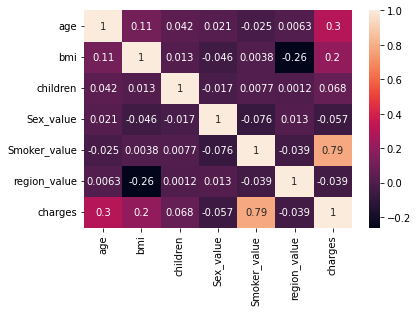

In [34]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [35]:
X = df[['age', 'bmi', 'children',
...        'Sex_value', 'Smoker_value', 'region_value']].values
X.shape[0]

1338

In [36]:
for i in range(X.shape[1]):
    max = X[:,i].max()
    min = X[:,i].min()
    X[:,i] = (X[:,i] - min)/(max - min)

In [37]:
y = df['charges'].values

In [38]:
X_train = []
y_train = []

X_test = []
y_test = []

for i in range(len(df)):
    if i <= int(len(df) * 0.8) : 
        X_train.append(X[i])
        y_train.append(y[i])
    elif  i > int(len(df) * 0.8) :
        y_test.append(y[i])
        X_test.append(X[i])


X_train = np.array(X_train)
y_train = np.array(y_train)
y_test  = np.array(y_test)
X_test = np.array(X_test)

In [39]:
X_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_b.shape[0]

1071

In [40]:
print("valores para la X de prueba: ",X_test.shape[0])
print("valores para la y de preba: ",y_test.shape[0])

valores para la X de prueba:  267
valores para la y de preba:  267


# Ecuación Normal

In [41]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
theta_best

array([-3391.37558314, 11910.27884603, 12762.28478385,  2175.7265214 ,
         246.98481765, 23715.30806014,  1215.04222268])

In [42]:
X_new = np.array(X_test)
X_new_b = np.c_[np.ones((X_test.shape[0],1)), X_new]
y_predict = X_new_b @ theta_best
y_predict.shape[0]

267

In [43]:
y_predict[:10]

array([14791.78666749,  3446.93384609, 12698.09979123,  9760.70791361,
        5595.46978348, 10711.74168703,  2057.94905037, 28310.57084827,
       15642.69853888,  -522.79341036])

In [44]:
y_test[:10]

array([13974.45555,  1909.52745, 12096.6512 , 13204.28565,  4562.8421 ,
        8551.347  ,  2102.2647 , 34672.1472 , 15161.5344 , 11884.04858])

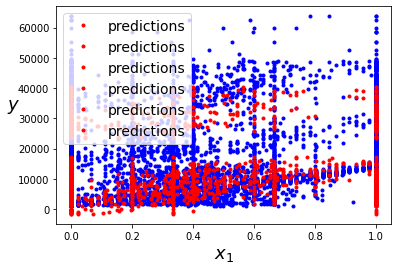

In [45]:
plt.plot(X, y, 'b.')
plt.plot(X_test, y_predict, 'r.', linewidth=2, label="predictions")
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.show()

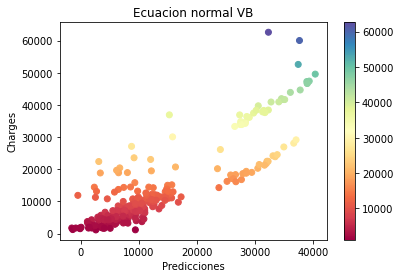

In [46]:
plt.scatter(y_predict, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Ecuacion normal VB')
plt.xlabel('Predicciones')
plt.ylabel('Charges')
plt.show()

# Batch Gradient Descent

In [51]:
eta = 0.01
n_iterations =2001
m= X_train.shape[0]

In [52]:
theta= np.random.randn(X_train.shape[1])
theta

array([ 0.68498164, -0.03695053,  1.10241051,  1.80989566,  1.84251121,
        1.58352482])

In [53]:
J_log = np.zeros(n_iterations)
for i in range(n_iterations):
    J_log[i]= (1/(2*m))*((X_train@theta-y_train)**2).sum()
    gradients = (1/m)*(X_train.T @ (X_train@theta - y_train))
    theta = theta - eta*gradients
    
theta

array([10739.42657534,  8144.36541802,  2257.2662363 ,  -182.17263326,
       22669.9949483 ,   420.750569  ])

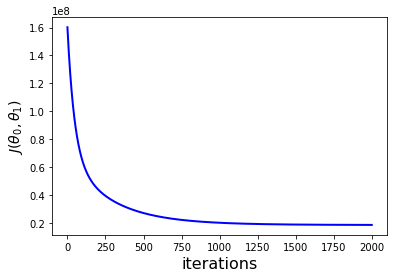

In [54]:
plt.plot(np.arange(n_iterations), J_log, 'b-', linewidth=2)
plt.xlabel('iterations', fontsize=16)
plt.ylabel(r'$J(\theta_0, \theta_1)$', fontsize=14)
plt.show()

# Stochastic Gradient Descent